# Importation de bibliothèques

In [42]:
import os
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import math
import random
from sklearn.feature_selection import SelectKBest, f_classif
import xgboost as ExGB

# Chargement des données

In [43]:
arcene_train = pd.read_csv("./data/ARCENE/arcene_train.data", sep=" ", header=None).drop([10000], axis=1)
arcene_train_labels = pd.read_csv("./data/ARCENE/arcene_train.labels", sep=" ", header=None)
arcene_valid = pd.read_csv("./data/ARCENE/arcene_valid.data", sep=" ", header=None).drop([10000], axis=1)
arcene_valid_labels = pd.read_csv("./data/arcene_valid.labels", sep=" ", header=None)
arcene_test = pd.read_csv("./data/ARCENE/arcene_test.data", sep=" ", header=None).drop([10000], axis=1)

In [44]:
# valid_column_means = arcene_valid.mean()
# 
# train_column_means = arcene_train.mean()

In [45]:
# arcene_valid = arcene_valid.replace(0, valid_column_means)
# arcene_train = arcene_train.replace(0, train_column_means)

# Remplacement des classes cibles de [-1, 1] à [False, True]

In [46]:
arcene_valid_labels = arcene_valid_labels.replace({1: True, -1: False})

arcene_train_labels = arcene_train_labels.replace({1: True, -1: False})

arcene_train_labels

,0
0,True
1,False
2,True
3,True
4,False
...,...
95,False
96,False
97,True
98,False


In [47]:
# arcene_train_concatinated = pd.concat([arcene_train, arcene_train_labels], axis=1, ignore_index=True)
# 
# arcene_valid_concatinated = pd.concat([arcene_valid, arcene_valid_labels], axis=1, ignore_index=True)

# Vérifier si l'ensemble de données est équilibré

       0  count
0  False     56
1   True     44


<Axes: xlabel='0', ylabel='count'>

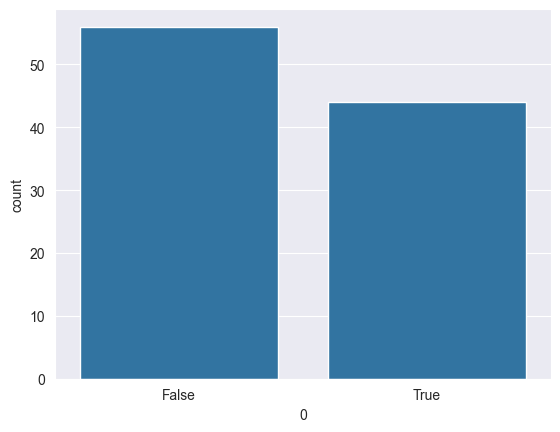

In [48]:
xx = arcene_train_labels[0].value_counts().reset_index()
print(xx)
sns.barplot(x=0, y='count', data=xx)

# Selection des features (caracteristiques)
Due que nous avons 10000 features avec des features aleatoires pour perturber le dataset et les algorithms, nous allons selectionner les features les plus importantes pour notre dataset.

Nous allons utiliser une methode pour selectionner les features les plus importants :
- K-best features

Avant faire ceci, le dataset contient des colonnes avec des valeurs constantes, donc on doit les supprimer.

Cette methode est utilisee pour trouver les colonnes non constantes :

In [49]:
def get_non_constant_columns(dataframe):
    return [col for col in dataframe.columns if len(dataframe[col].unique()) > 1]

keep_columns = get_non_constant_columns(arcene_train)

Pour qu'on apres les laisser dans le dataset.

In [50]:
arcene_train = arcene_train[keep_columns]

arcene_valid = arcene_valid[keep_columns]

arcene_test = arcene_test[keep_columns]

Maintenant on peut utiliser la methode K-best pour selectionner les 120 meilleures caracteristiques.

On va utiliser la fonction f_classif pour calculer la corrélation entre chaque caractéristique et la variable cible.

In [51]:
# Create a SelectKBest object
skb = SelectKBest(score_func=f_classif, # Set f_classif as our criteria to select features
                  k=120)                  # Select top two features based on the criteria

# Train and transform the dataset according to the SelectKBest
arcene_train_filtered = skb.fit_transform(arcene_train, arcene_train_labels)

# Print the results
print('Number of features before feature selection: {}'.format(arcene_train.shape[1]))
print('Number of features after feature selection: {}'.format(arcene_train_filtered.shape[1]))
print('Features selected: {}'.format(skb.get_support(indices=True)))

D:\FST\MST - AIDS\S1\ML\PROJECTS\DEVOIR2\venv\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Number of features before feature selection: 9920
Number of features after feature selection: 120
Features selected: [   4    9   65   85  108  289  306  370  381  408  429  459  461  479
  530  686  770  789  846  860  901  970 1135 1171 1463 1707 1732 1734
 1773 1835 1869 1959 2117 2207 2289 2618 2676 2792 2840 3232 3336 3341
 3527 3573 3584 3660 3693 3787 3952 4036 4087 4149 4253 4481 4518 4587
 4743 4833 4914 4927 4959 4994 5136 5423 5704 5756 5853 5989 6070 6148
 6423 6443 6528 6625 6642 6707 6716 6869 6972 7032 7039 7101 7134 7156
 7365 7406 7476 7562 7585 7589 7635 7651 7668 7682 7790 7846 7854 7909
 7926 8080 8196 8275 8290 8297 8340 8390 8411 8431 8514 8712 8729 8733
 8757 8951 9202 9506 9538 9571 9580 9664]


# Concaténation des données d'apprentissage et des étiquettes

In [52]:
arcene_train_filtered = pd.DataFrame(arcene_train_filtered)

arcene_train_filtered

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
0,0,0,0,0,0,466,3,0,0,6,...,0,0,0,5,450,0,0,0,0,8
1,60,0,9,0,0,395,92,85,0,83,...,21,0,66,75,337,27,89,59,31,65
2,0,0,0,0,0,483,19,2,0,21,...,0,0,0,20,399,0,6,0,0,0
3,14,0,0,0,0,439,56,42,0,55,...,0,0,45,52,476,0,46,18,0,51
4,0,1,0,38,0,342,44,19,0,49,...,12,28,111,48,292,0,24,1,0,122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,177,164,0,200,0,183,152,203,194,...,3,0,7,198,94,5,157,130,2,10
96,71,163,159,43,136,0,190,171,136,195,...,70,38,67,197,68,65,175,151,66,65
97,0,0,0,15,0,467,0,4,0,2,...,0,25,0,3,469,0,3,0,0,0
98,69,3,19,14,0,420,12,26,0,10,...,43,25,41,9,432,50,22,41,51,32


In [53]:
arcene_valid_filtered = skb.transform(arcene_valid)

arcene_valid_filtered = pd.DataFrame(arcene_valid_filtered)

arcene_valid_filtered

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
0,2,0,0,1,0,410,21,40,0,14,...,0,9,7,11,392,0,38,41,0,0
1,0,222,202,0,145,0,195,160,151,213,...,0,0,17,222,169,4,164,147,3,12
2,53,147,133,39,143,0,137,106,142,145,...,52,34,61,148,31,61,113,73,59,58
3,0,0,4,0,0,437,15,24,0,11,...,0,0,42,9,453,0,23,10,0,27
4,2,0,0,0,0,470,21,24,0,16,...,0,0,3,13,431,0,25,13,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,92,261,254,86,297,0,274,254,298,282,...,104,77,102,287,101,88,257,230,86,97
96,109,134,121,69,148,145,193,170,150,203,...,80,68,91,206,130,101,173,153,101,89
97,0,0,0,15,0,263,17,0,0,20,...,3,5,87,19,308,0,1,0,0,95
98,0,4,9,0,9,388,83,75,8,80,...,0,0,0,78,323,0,79,50,0,0


In [54]:
arcene_test_filtered = skb.transform(arcene_test)

arcene_test_filtered = pd.DataFrame(arcene_test_filtered)

arcene_test_filtered

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
0,0,16,15,16,7,203,56,38,7,51,...,9,15,92,47,332,0,45,5,0,99
1,69,141,139,66,129,0,140,131,130,145,...,71,63,86,149,208,80,133,123,81,82
2,0,180,160,4,263,241,216,183,276,233,...,0,5,10,242,147,0,187,152,0,1
3,0,0,0,0,0,500,69,72,0,56,...,0,0,7,47,406,0,75,44,0,4
4,84,112,101,78,135,156,133,117,139,143,...,59,74,86,149,140,87,119,99,86,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,55,144,133,0,174,0,136,115,175,143,...,0,0,10,146,149,53,119,95,52,4
696,30,127,121,46,137,57,119,101,138,128,...,38,45,54,133,90,44,104,80,43,51
697,18,214,190,44,218,0,206,166,222,220,...,62,41,73,227,56,65,174,127,65,69
698,38,30,34,28,57,477,27,19,69,33,...,8,35,57,37,383,20,21,1,21,46


# Implementation de l'algorithme Extreme Gradient Boosting (XGBoost):

In [55]:
class Node:

    '''
    Un objet nœud qui est appelé de manière récurrente en son sein pour construire un arbre de régression. Basé sur XGBoost de Tianqi Chen 
    le gain interne utilisé pour trouver la valeur de division optimale utilise à la fois le gradient et la valeur hessienne. De même, une esquisse de quantlie pondérée 
    et les valeurs optimales des feuilles suivent la description de Chen dans "XGBoost : A Scalable Tree Boosting System", la seule chose qui n'est pas implémentée dans cette version est la sparsité. 
    Dans cette version, la seule chose qui n'a pas été implémentée est l'ajustement tenant compte de l'éparpillement ou la capacité à gérer les valeurs NA avec une direction par défaut.
    
    Entrées
    ------------------------------------------------------------------------------------------------------------------
    x : cadre de données pandas des données d'apprentissage
    gradient : gradient négatif de la fonction de perte
    hessian : dérivée de second ordre de la fonction de perte
    idxs : utilisé pour garder une trace des échantillons dans la structure de l'arbre
    subsample_cols : implémentation d'un sous-échantillon de colonnes par couches qui randomise la structure des arbres.
    (paramètre de complexité)
    min_leaf : nombre minimum d'échantillons pour qu'un nœud soit considéré comme tel (paramètre de complexité)
    min_child_weight : la somme des heassian à l'intérieur d'un noeud est une mesure de la pureté (paramètre de complexité)
    depth : limite le nombre de couches dans l'arbre
    lambda : terme de régularisation L2 sur les poids. L'augmentation de cette valeur rendra le modèle plus conservateur.
    gamma : Ce paramètre empêche également l'ajustement excessif et est présent dans le calcul du gain (score de structure). 
    Comme il est soustrait du gain, il fixe essentiellement un gain minimum pour effectuer une scission dans un nœud.
    eps : Ce paramètre est utilisé dans la méthode du quantile weighted skecth ou de l'arbre "approximatif". 
    (1 / sketch_eps) nombre de cellules
    Résultats
    --------------------------------------------------------------------------------------------------------------------
    Un objet arbre unique qui sera utilisé pour le renforcement du gradient.
    '''

    def __init__(self, x, gradient, hessian, idxs, subsample_cols = 0.8 , min_leaf = 5, min_child_weight = 1 ,depth = 10, lambda_ = 1, gamma = 1, eps = 0.1):

        self.x, self.gradient, self.hessian = x, gradient, hessian
        self.idxs = idxs 
        self.depth = depth
        self.min_leaf = min_leaf
        self.lambda_ = lambda_
        self.gamma  = gamma
        self.min_child_weight = min_child_weight
        self.row_count = len(idxs)
        self.col_count = x.shape[1]
        self.subsample_cols = subsample_cols
        self.eps = eps
        self.column_subsample = np.random.permutation(self.col_count)[:round(self.subsample_cols*self.col_count)]

        self.val = self.compute_gamma(self.gradient[self.idxs], self.hessian[self.idxs])

        self.score = float('-inf')
        self.find_varsplit()


    def compute_gamma(self, gradient, hessian):
        '''
        Calcule la valeur optimale de la feuille équation (5) dans "XGBoost : Un système de booster d'arbre évolutif"
        '''
        return(-np.sum(gradient)/(np.sum(hessian) + self.lambda_))

    def find_varsplit(self):
        '''
        Examine chaque colonne et calcule le meilleur point de séparation.
        Le nœud est alors divisé en ce point et deux nouveaux nœuds sont créés.
        La profondeur est le seul paramètre à modifier, car nous avons ajouté une nouvelle couche à la structure de l'arbre.
        Si aucune scission n'est meilleure que le score initialisé au début, aucune scission n'est effectuée.
        '''
        for c in self.column_subsample: self.find_greedy_split(c)
        if self.is_leaf: return
        x = self.split_col
        lhs = np.nonzero(x <= self.split)[0]
        rhs = np.nonzero(x > self.split)[0]
        self.lhs = Node(x = self.x, gradient = self.gradient, hessian = self.hessian, idxs = self.idxs[lhs], min_leaf = self.min_leaf, depth = self.depth-1, lambda_ = self.lambda_ , gamma = self.gamma, min_child_weight = self.min_child_weight, eps = self.eps, subsample_cols = self.subsample_cols)
        self.rhs = Node(x = self.x, gradient = self.gradient, hessian = self.hessian, idxs = self.idxs[rhs], min_leaf = self.min_leaf, depth = self.depth-1, lambda_ = self.lambda_ , gamma = self.gamma, min_child_weight = self.min_child_weight, eps = self.eps, subsample_cols = self.subsample_cols)

    def find_greedy_split(self, var_idx):
        '''
        Pour une caractéristique donnée, calcule avec avidité le gain à chaque division.
        Met à jour globalement le meilleur score et le point de séparation si un meilleur point de séparation est trouvé.
        '''
        x = self.x.values[self.idxs, var_idx]

        for r in range(self.row_count):
            lhs = x <= x[r]
            rhs = x > x[r]

            lhs_indices = np.nonzero(x <= x[r])[0]
            rhs_indices = np.nonzero(x > x[r])[0]
            if(rhs.sum() < self.min_leaf or lhs.sum() < self.min_leaf 
               or self.hessian[lhs_indices].sum() < self.min_child_weight
               or self.hessian[rhs_indices].sum() < self.min_child_weight): continue

            curr_score = self.gain(lhs, rhs)
            if curr_score > self.score: 
                self.var_idx = var_idx
                self.score = curr_score
                self.split = x[r]

    def weighted_qauntile_sketch(self, var_idx):
        '''
        XGBOOST Mini-Version
        Yiyang "Joe" Zeng
        Est une approximation de l'approche eact greedy plus rapide pour les grands ensembles de données où il n'est pas possible de calculer le gain à chaque point de séparation.
        de calculer le gain à chaque point de partage. Utilise les équations (8) et (9) de "XGBoost : A Scalable Tree Boosting System" (Un système évolutif de renforcement des arbres)
        '''
        x = self.x.values[self.idxs, var_idx]
        hessian_ = self.hessian[self.idxs]
        df = pd.DataFrame({'feature':x,'hess':hessian_})

        df.sort_values(by=['feature'], ascending = True, inplace = True)
        hess_sum = df['hess'].sum() 
        df['rank'] = df.apply(lambda x : (1/hess_sum)*sum(df[df['feature'] < x['feature']]['hess']), axis=1)

        for row in range(df.shape[0]-1):
            # look at the current rank and the next ran
            rk_sk_j, rk_sk_j_1 = df['rank'].iloc[row:row+2]
            diff = abs(rk_sk_j - rk_sk_j_1)
            if(diff >= self.eps):
                continue

            split_value = (df['rank'].iloc[row+1] + df['rank'].iloc[row])/2
            lhs = x <= split_value
            rhs = x > split_value

            lhs_indices = np.nonzero(x <= split_value)[0]
            rhs_indices = np.nonzero(x > split_value)[0]
            if(rhs.sum() < self.min_leaf or lhs.sum() < self.min_leaf 
               or self.hessian[lhs_indices].sum() < self.min_child_weight
               or self.hessian[rhs_indices].sum() < self.min_child_weight): continue

            curr_score = self.gain(lhs, rhs)
            if curr_score > self.score: 
                self.var_idx = var_idx
                self.score = curr_score
                self.split = split_value

    def gain(self, lhs, rhs):
        '''
        Calcule le gain à un point de partage particulier sur la base de l'équation (7) de
        "XGBoost : Un système évolutif de renforcement des arbres
        '''
        gradient = self.gradient[self.idxs]
        hessian  = self.hessian[self.idxs]

        lhs_gradient = gradient[lhs].sum()
        lhs_hessian  = hessian[lhs].sum()

        rhs_gradient = gradient[rhs].sum()
        rhs_hessian  = hessian[rhs].sum()

        gain = 0.5 *( (lhs_gradient**2/(lhs_hessian + self.lambda_)) + (rhs_gradient**2/(rhs_hessian + self.lambda_)) - ((lhs_gradient + rhs_gradient)**2/(lhs_hessian + rhs_hessian + self.lambda_))) - self.gamma
        return(gain)

    @property
    def split_col(self):
        '''
        splits a column 
        '''
        return self.x.values[self.idxs , self.var_idx]

    @property
    def is_leaf(self):
        '''
        checks if node is a leaf
        '''
        return self.score == float('-inf') or self.depth <= 0                 

    def predict(self, x):
        return np.array([self.predict_row(xi) for xi in x])

    def predict_row(self, xi):
        if self.is_leaf:
            return(self.val)

        node = self.lhs if xi[self.var_idx] <= self.split else self.rhs
        return node.predict_row(xi)


class XGBoostTree:
    '''
    Classe enveloppante qui fournit une interface scikit learn à l'arbre de régression récursif ci-dessus.
    
    Entrées
    ------------------------------------------------------------------------------------------------------------------
    x : datframe pandas des données d'apprentissage
    gradient : gradient négatif de la fonction de perte
    hessian : dérivée de second ordre de la fonction de perte
    idxs : utilisé pour garder une trace des échantillons dans la structure de l'arbre
    subsample_cols : implémentation d'un sous-échantillon de colonnes par couches qui randomise la structure des arbres.
    (paramètre de complexité)
    min_leaf : nombre minimum d'échantillons pour qu'un nœud soit considéré comme tel (paramètre de complexité)
    min_child_weight : la somme des heassian à l'intérieur d'un noeud est une mesure de la pureté (paramètre de complexité)
    depth : limite le nombre de couches dans l'arbre
    lambda : terme de régularisation L2 sur les poids. L'augmentation de cette valeur rendra le modèle plus conservateur.
    gamma : Ce paramètre empêche également l'ajustement excessif et est présent dans le calcul du gain (score de structure). 
    Comme il est soustrait du gain, il fixe essentiellement un gain minimum pour effectuer une scission dans un nœud.
    eps : Ce paramètre est utilisé dans la méthode du quantile weighted skecth ou de l'arbre "approximatif". 
    (1 / sketch_eps) nombre de cellules

    Résultats
    --------------------------------------------------------------------------------------------------------------------
    Un seul objet arbre qui sera utilisé pour le gradient.
    '''
    def fit(self, x, gradient, hessian, subsample_cols = 0.8 , min_leaf = 5, min_child_weight = 1 ,depth = 10, lambda_ = 1, gamma = 1, eps = 0.1):
        self.dtree = Node(x, gradient, hessian, np.array(np.arange(len(x))), subsample_cols, min_leaf, min_child_weight, depth, lambda_, gamma, eps)
        return self

    def predict(self, X):
        return self.dtree.predict(X.values)


class XGBoostClassifier:
    '''
    Application complète de l'algorithme XGBoost tel que décrit dans "XGBoost : A Scalable Tree Boosting System" pour la classification binaire.
    
    Entrées
    ------------------------------------------------------------------------------------------------------------------
    x : cadre de données pandas des données d'apprentissage
    gradient : gradient négatif de la fonction de perte
    hessian : dérivée de second ordre de la fonction de perte
    idxs : utilisé pour garder une trace des échantillons dans la structure de l'arbre
    subsample_cols : implémentation d'un sous-échantillon de colonnes par couches qui randomise la structure des arbres.
    (paramètre de complexité)
    min_leaf : nombre minimum d'échantillons pour qu'un nœud soit considéré comme tel (paramètre de complexité)
    min_child_weight : la somme des heassian à l'intérieur d'un noeud est une mesure de la pureté (paramètre de complexité)
    depth : limite le nombre de couches dans l'arbre
    lambda : terme de régularisation L2 sur les poids. L'augmentation de cette valeur rendra le modèle plus conservateur.
    gamma : Ce paramètre empêche également l'ajustement excessif et est présent dans le calcul du gain (score de structure). 
    Comme il est soustrait du gain, il fixe essentiellement un gain minimum pour effectuer une scission dans un nœud.
    eps : Ce paramètre est utilisé dans la méthode du quantile weighted skecth ou de l'arbre "approximatif". 
    (1 / sketch_eps) nombre de cellules
    Résultats
    --------------------------------------------------------------------------------------------------------------------
    Un seul objet arbre qui sera utilisé pour le gradient.
    '''
    def __init__(self):
        self.estimators = []

    def get_params(self, deep=False):
        return {
            'subsample_cols': self.subsample_cols,
            'min_child_weight': self.min_child_weight,
            'depth': self.depth,
            'min_leaf': self.min_leaf,
            'learning_rate': self.learning_rate,
            'boosting_rounds': self.boosting_rounds,
            'lambda_': self.lambda_,
            'gamma': self.gamma,
            'eps': self.eps
        }


    @staticmethod
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))

    # first order gradient logLoss
    def grad(self, preds, labels):
        preds = self.sigmoid(preds)
        return(preds - labels)

    # second order gradient logLoss
    def hess(self, preds, labels):
        preds = self.sigmoid(preds)
        return(preds * (1 - preds))

    @staticmethod
    def log_odds(column):
        binary_yes = np.count_nonzero(column == 1)
        binary_no  = np.count_nonzero(column == 0)
        return(np.log(binary_yes/binary_no))


    def fit(self, X, y, subsample_cols = 0.8 , min_child_weight = 1, depth = 5, min_leaf = 5, learning_rate = 0.4, boosting_rounds = 5, lambda_ = 1.5, gamma = 1, eps = 0.1):
        self.X, self.y = X, y
        self.depth = depth
        self.subsample_cols = subsample_cols
        self.eps = eps
        self.min_child_weight = min_child_weight 
        self.min_leaf = min_leaf
        self.learning_rate = learning_rate
        self.boosting_rounds = boosting_rounds 
        self.lambda_ = lambda_
        self.gamma  = gamma

        self.base_pred = np.full((X.shape[0], 1), 1).flatten().astype('float64')

        for booster in range(self.boosting_rounds):
            Grad = self.grad(self.base_pred, self.y)
            Hess = self.hess(self.base_pred, self.y)
            boosting_tree = XGBoostTree().fit(self.X, Grad, Hess, depth = self.depth, min_leaf = self.min_leaf, lambda_ = self.lambda_, gamma = self.gamma, eps = self.eps, min_child_weight = self.min_child_weight, subsample_cols = self.subsample_cols)
            self.base_pred += self.learning_rate * boosting_tree.predict(self.X)
            self.estimators.append(boosting_tree)

    def predict_proba(self, X):
        pred = np.zeros(X.shape[0])

        for estimator in self.estimators:
            pred += self.learning_rate * estimator.predict(X) 

        return(self.sigmoid(np.full((X.shape[0], 1), 1).flatten().astype('float64') + pred))

    def predict(self, X):
        pred = np.zeros(X.shape[0])
        for estimator in self.estimators:
            pred += self.learning_rate * estimator.predict(X) 

        predicted_probas = self.sigmoid(np.full((X.shape[0], 1), 1).flatten().astype('float64') + pred)
        preds = np.where(predicted_probas > np.mean(predicted_probas), 1, 0)
        return(preds)


class XGBoostRegressor:
    '''
    Application complète de l'algorithme XGBoost tel que décrit dans "XGBoost : A Scalable Tree Boosting System" pour la régression.
    
    Entrées
    ------------------------------------------------------------------------------------------------------------------
    x : cadre de données pandas des données d'apprentissage
    gradient : gradient négatif de la fonction de perte
    hessian : dérivée de second ordre de la fonction de perte
    idxs : utilisé pour garder une trace des échantillons dans la structure de l'arbre
    subsample_cols : implémentation d'un sous-échantillon de colonnes par couches qui randomise la structure des arbres.
    (paramètre de complexité)
    min_leaf : nombre minimum d'échantillons pour qu'un nœud soit considéré comme tel (paramètre de complexité)
    min_child_weight : la somme des heassian à l'intérieur d'un noeud est une mesure de la pureté (paramètre de complexité)
    depth : limite le nombre de couches dans l'arbre
    lambda : terme de régularisation L2 sur les poids. L'augmentation de cette valeur rendra le modèle plus conservateur.
    gamma : Ce paramètre empêche également l'ajustement excessif et est présent dans le calcul du gain (score de structure). 
    Comme il est soustrait du gain, il fixe essentiellement un gain minimum pour effectuer une scission dans un nœud.
    eps : Ce paramètre est utilisé dans la méthode du quantile weighted skecth ou de l'arbre "approximatif". 
    (1 / sketch_eps) nombre de cellules
    Résultats
    --------------------------------------------------------------------------------------------------------------------
    Un seul objet arbre qui sera utilisé pour le gradient.
    '''
    def __init__(self):
        self.estimators = []

    def get_params(self):
        return {
            'subsample_cols': self.subsample_cols,
            'min_child_weight': self.min_child_weight,
            'depth': self.depth,
            'min_leaf': self.min_leaf,
            'learning_rate': self.learning_rate,
            'boosting_rounds': self.boosting_rounds,
            'lambda_': self.lambda_,
            'gamma': self.gamma,
            'eps': self.eps
        }
    # first order gradient mean squared error
    @staticmethod
    def grad(preds, labels):
        return(2*(preds-labels))

    # second order gradient logLoss
    @staticmethod
    def hess(preds, labels):
        '''
        la hessienne de l'erreur quadratique moyenne est une valeur constante de deux
        renvoie un tableau de deux
        '''
        return(np.full((preds.shape[0], 1), 2).flatten().astype('float64'))


    def fit(self, X, y, subsample_cols = 0.8 , min_child_weight = 1, depth = 5, min_leaf = 5, learning_rate = 0.4, boosting_rounds = 5, lambda_ = 1.5, gamma = 1, eps = 0.1):
        self.X, self.y = X, y.values
        self.depth = depth
        self.subsample_cols = subsample_cols
        self.eps = eps
        self.min_child_weight = min_child_weight 
        self.min_leaf = min_leaf
        self.learning_rate = learning_rate
        self.boosting_rounds = boosting_rounds 
        self.lambda_ = lambda_
        self.gamma  = gamma

        self.base_pred = np.full((X.shape[0], 1), np.mean(y)).flatten().astype('float64')

        for booster in range(self.boosting_rounds):
            Grad = self.grad(self.base_pred, self.y)
            Hess = self.hess(self.base_pred, self.y)
            boosting_tree = XGBoostTree().fit(self.X, Grad, Hess, depth = self.depth, min_leaf = self.min_leaf, lambda_ = self.lambda_, gamma = self.gamma, eps = self.eps, min_child_weight = self.min_child_weight, subsample_cols = self.subsample_cols)
            self.base_pred += self.learning_rate * boosting_tree.predict(self.X)
            self.estimators.append(boosting_tree)

    def predict(self, X):
        pred = np.zeros(X.shape[0])

        for estimator in self.estimators:
            pred += self.learning_rate * estimator.predict(X) 

        return np.full((X.shape[0], 1), np.mean(y)).flatten().astype('float64') + pred

# Apprentissage et test de l'algorithme

In [56]:
xgb = XGBoostClassifier()

arcene_train_labels_reshaped = arcene_train_labels.values.reshape(len(arcene_train_labels), 1)
arcene_valid_labels_reshaped = arcene_valid_labels.values.reshape(len(arcene_train_labels), 1)

xgb.fit(arcene_train_filtered, arcene_train_labels_reshaped, depth = 5, min_leaf = 5, learning_rate = 0.1, boosting_rounds = 5)

predictions = xgb.predict(arcene_valid_filtered)

pred_len = len(predictions)

predictions = predictions.reshape(pred_len, 1)

print("Number of mislabeled points out of a total %d points : %d" % (arcene_valid.shape[0], (arcene_valid_labels_reshaped != predictions).sum()))

Number of mislabeled points out of a total 100 points : 38


### Matrice de confusion
La matrice de confusion est une matrice qui permet de visualiser les performances d'un algorithme de classification. 

In [57]:
cm = metrics.confusion_matrix(arcene_valid_labels, predictions)

cm

array([[53,  3],
       [35,  9]], dtype=int64)

### Visualisation de la matrice de confusion

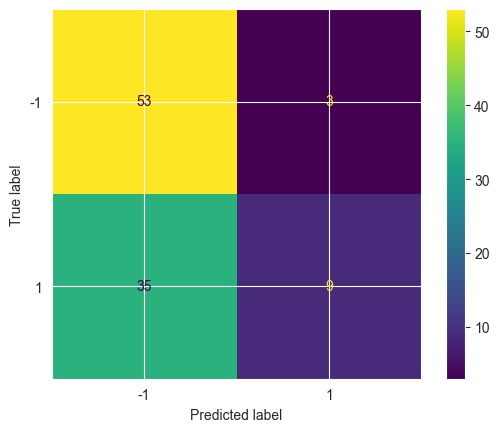

In [58]:
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[-1, 1])
disp.plot()

plt.show()

### Calcul des métriques
Les métriques qui seront calculées sont :
- Balanced Error Rate
- Accuracy
- Precision
- Recall
- F1 Score
- AUC Score
- ROC Curve

Ces metriques on ete conseillees par les juges du challenge Arcene pour evaluer les performances des algorithmes de classification. (https://web.archive.org/web/20130503080434/http://www.nipsfsc.ecs.soton.ac.uk/evaluation)
Pour plus d'informations sur ces métriques, veuillez consulter ce lien : https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62

In [59]:
TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]

BER = 1 - (1/2 * ((TP / (TP + FN)) + (TN / (TN + FP))))

precision = metrics.precision_score(arcene_valid_labels, predictions, average='macro')

recall = metrics.recall_score(arcene_valid_labels, predictions, average='macro')

f1_score = metrics.f1_score(arcene_valid_labels, predictions, average='macro')

accuracy = metrics.accuracy_score(arcene_valid_labels, predictions)

auc_score = metrics.roc_auc_score(arcene_valid_labels, predictions)

print('Balanced Error Rate: ', BER)
print('Accuracy:            ', accuracy)
print('Precision:           ', precision)
print('Recall:              ', recall)
print('F1 Score:            ', f1_score)
print('AUC Score:           ', auc_score)

Balanced Error Rate:  0.32386363636363635
Accuracy:             0.62
Precision:            0.6761363636363636
Recall:               0.575487012987013
F1 Score:             0.5287698412698413
AUC Score:            0.575487012987013


##### Courbe ROC:

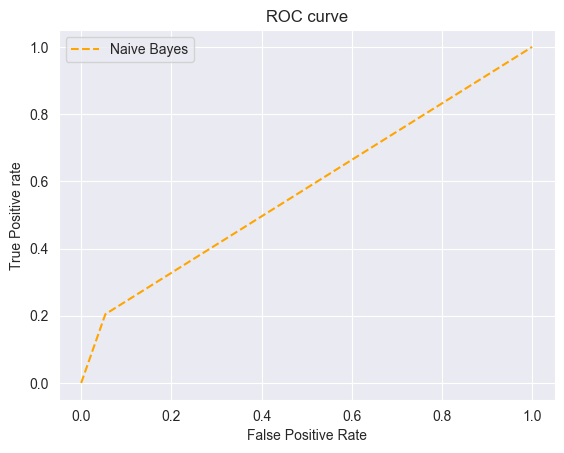

In [60]:
fpr, tpr, thresh = metrics.roc_curve(arcene_valid_labels, predictions, pos_label=1)

# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='orange', label='Naive Bayes')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

Ajouter une colonne inutile au donnees de test just pour pouvoir les tester avec l'algorithme.

Predire les classes des donnees de test:

In [61]:
test_pred = xgb.predict(arcene_test_filtered)

pred_len = len(test_pred)

test_pred = test_pred.reshape(pred_len, 1)

test_pred

array([[0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

### Visualisation des classes predites

   0  count
0  0    577
1  1    123


<Axes: xlabel='0', ylabel='count'>

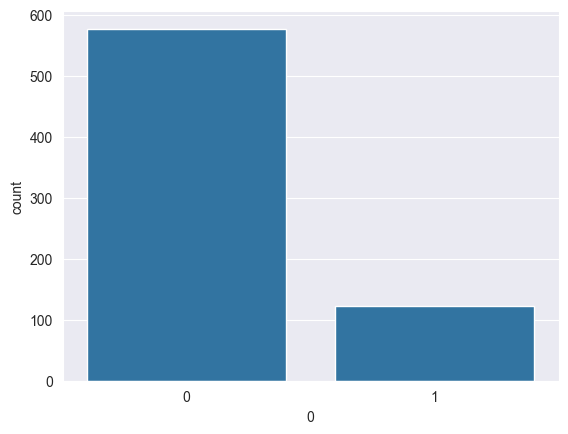

In [62]:
test_pred = pd.DataFrame(test_pred)

yy = test_pred.value_counts().reset_index()
print(yy)
sns.barplot(x=0, y='count', data=yy)

# Implementation de l'algorithme Extreme Gradient Boosting (XGBoost) avec la bibliotheque sklearn

In [63]:
xgbb = ExGB.XGBClassifier()

xgbb.fit(arcene_train_filtered, arcene_train_labels)

y_pred = xgbb.predict(arcene_valid_filtered)

pred_len = len(y_pred)

y_pred = y_pred.reshape(pred_len, 1)

print("Number of mislabeled points out of a total %d points : %d" % (arcene_valid.shape[0], (arcene_valid_labels != y_pred).sum()))

Number of mislabeled points out of a total 100 points : 40


C:\Users\legion\AppData\Local\Temp\ipykernel_20892\2617077726.py:11: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print("Number of mislabeled points out of a total %d points : %d" % (arcene_valid.shape[0], (arcene_valid_labels != y_pred).sum()))


### Matrice de confusion

In [64]:
cm_with_sklearn = metrics.confusion_matrix(arcene_valid_labels, y_pred)

cm_with_sklearn

array([[39, 17],
       [23, 21]], dtype=int64)

### Visualisation de la matrice de confusion

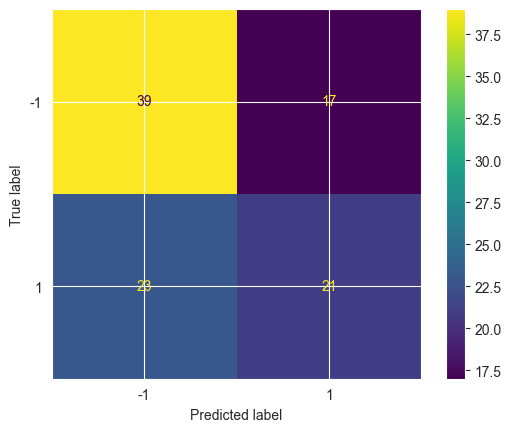

In [65]:
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_with_sklearn, display_labels=[-1, 1])
disp.plot()

plt.show()

### Calcul des métriques

In [66]:
TP_with_sklearn = cm_with_sklearn[0][0]
FP_with_sklearn = cm_with_sklearn[0][1]
FN_with_sklearn = cm_with_sklearn[1][0]
TN_with_sklearn = cm_with_sklearn[1][1]

BER_with_sklearn = 1 - (1/2 * ((TP_with_sklearn / (TP_with_sklearn + FN_with_sklearn)) + (TN_with_sklearn / (TN_with_sklearn + FP_with_sklearn))))

precision_with_sklearn = metrics.precision_score(arcene_valid_labels, y_pred, average='macro')

recall_with_sklearn = metrics.recall_score(arcene_valid_labels, y_pred, average='macro')

f1_score_with_sklearn = metrics.f1_score(arcene_valid_labels, y_pred, average='macro')

accuracy_with_sklearn = metrics.accuracy_score(arcene_valid_labels, y_pred)

auc_score_with_sklearn = metrics.roc_auc_score(arcene_valid_labels, y_pred)

print('Balanced Error Rate: ', BER_with_sklearn)
print('Accuracy:            ', accuracy_with_sklearn)
print('Precision:           ', precision_with_sklearn)
print('Recall:              ', recall_with_sklearn)
print('F1 Score:            ', f1_score_with_sklearn)
print('AUC Score:           ', auc_score_with_sklearn)

Balanced Error Rate:  0.4091680814940577
Accuracy:             0.6
Precision:            0.5908319185059423
Recall:               0.5868506493506493
F1 Score:             0.586606035551881
AUC Score:            0.5868506493506492


##### Courbe ROC:

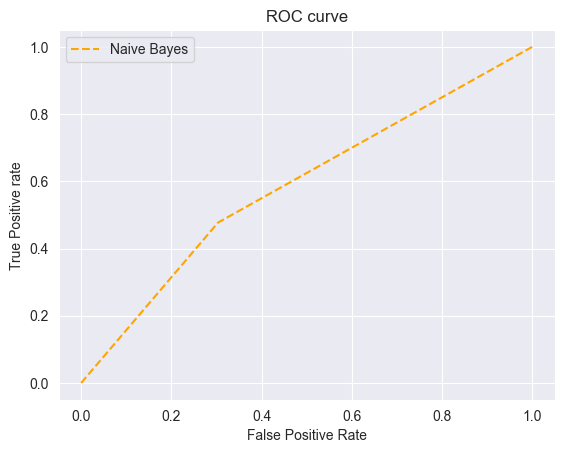

In [67]:
fpr_with_sklearn, tpr_with_sklearn, thresh_with_sklearn = metrics.roc_curve(arcene_valid_labels, y_pred, pos_label=1)

# plot roc curves
plt.plot(fpr_with_sklearn, tpr_with_sklearn, linestyle='--',color='orange', label='Naive Bayes')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

### Visualisation des classes predites

In [68]:
arcene_test_filtered_serie = arcene_test_filtered.squeeze()

test_pred_with_sklearn = xgbb.predict(arcene_test_filtered_serie)

   0  count
0  0    432
1  1    268


<Axes: xlabel='0', ylabel='count'>

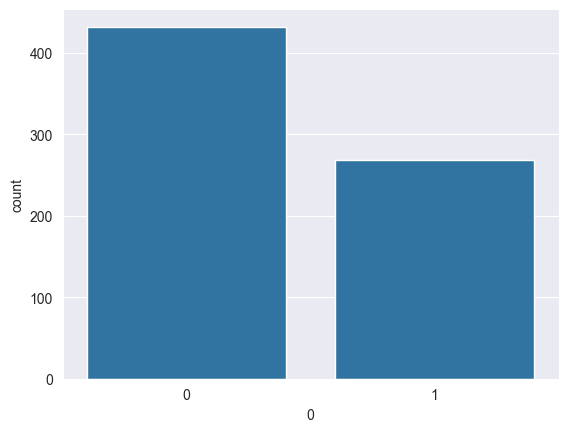

In [69]:
test_pred_with_sklearn = pd.DataFrame(test_pred_with_sklearn)

yy_with_sklearn = test_pred_with_sklearn.value_counts().reset_index()
print(yy_with_sklearn)
sns.barplot(x=0, y='count', data=yy_with_sklearn)

### Apprentissage et test de l'algorithme

In [70]:
# from sklearn.feature_selection import RFE

# model = XGBoostClassifier()
# 
# rfe = RFE(estimator=model, n_features_to_select=5)
# 
# rfe = rfe.fit(arcene_train, arcene_train_labels)
# 
# rfe.support_
# 
# rfe.ranking_
# 
# arcene_train_filtered_2 = rfe.transform(arcene_train)
# 
# arcene_train_filtered_2 = pd.DataFrame(arcene_train_filtered_2)
# 
# arcene_valid_filtered_2 = rfe.transform(arcene_valid)
# 
# arcene_valid_filtered_2 = pd.DataFrame(arcene_valid_filtered_2)
# 
# y_pred = model.fit(arcene_train_filtered_2, arcene_train_labels).predict(arcene_valid_filtered_2)
# 
# pred_len = len(y_pred)
# 
# y_pred = y_pred.reshape(pred_len, 1)
# 
# print("Number of mislabeled points out of a total %d points : %d" % (arcene_valid.shape[0], (arcene_valid_labels != y_pred).sum()))